# Homework 04 - Applied ML

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline

## 1. Predict the skin color of a soccer player

In this first task we train a *Random forest* classifier to be able to predict the skin color of a soccer player. In order to do so, we proceed pre-processing the data as first step then moving toward the choice of the model (interpret as the choice of parameters controlling the possible issues i.e. the *overfitting*). As required, we then switch to the inspection of the `feature_importances_` attribute and the discussion of the obtained results.

### 1.1 Exploratory Data Analysis, Feature Selection and Feature engineering

In [2]:
# Import data 
data = pd.read_csv('CrowdstormingDataJuly1st.csv', sep = ',')

In [3]:
data.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [4]:
data.columns

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')

##### First clean of data
According to the given information in the [data description](https://github.com/ADAEPFL/Homework/blob/master/04%20-%20Applied%20ML/DATA.md), we get rid off all the dyads that correspond to players whose picture is not available.

In [27]:
data_clean = data[data.photoID.notnull()]

##### Have a glance at the labels

Thus, we check whether happens that one of the two raters do not assign the label. We see that both of them do their job. 

In [6]:
# How many players the rater 1 don't label?
miss_rater_1 = sum(data_clean.rater1.isnull())
# How many the rater 2?
miss_rater_2 = sum(data_clean.rater2.isnull())

print ('Rater 1 does not label', miss_rater_1, 'players')
print ('Rater 2 does not label', miss_rater_2, 'players')

Rater 1 does not label 0 players
Rater 2 does not label 0 players


We study the distribution of the labels, even to verify disagreements between the two raters. The procedure consist of:
- Grouping by the `playerShort`
- Get the given labels
- Plot their distribution using a *simple* barplot

In [56]:
# Group by player
grouped = data_clean[['playerShort','rater1', 'rater2']].groupby('playerShort')
# Use as values for the label the mean of scores given to each player (we can use the mean since each rater gives only
# one label to each player)
rates = grouped.mean()

In [23]:
different_rates = rates[rates['rater1'] != rates['rater2']]

([array([ 626.,    0.,  551.,    0.,    0.,  170.,    0.,  140.,    0.,   98.]),
  array([ 451.,    0.,  693.,    0.,    0.,  174.,    0.,  141.,    0.,  126.])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 2 Lists of Patches objects>)

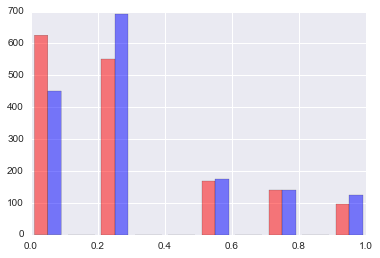

In [25]:
plt.hist([rates['rater1'], rates['rater2']], color=['r','b'], alpha=0.5)

([array([ 202.,    0.,   81.,    0.,    0.,   54.,    0.,   36.,    0.,    6.]),
  array([  27.,    0.,  223.,    0.,    0.,   58.,    0.,   37.,    0.,   34.])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 2 Lists of Patches objects>)

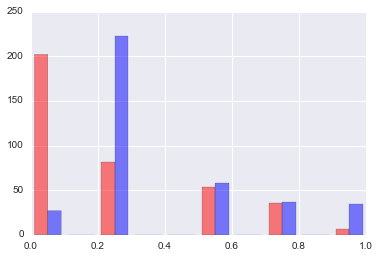

In [26]:
plt.hist([different_rates['rater1'], different_rates['rater2']], color=['r','b'], alpha=0.5)

In [54]:
rates['rater1'].mean()

0.26861198738170344

In [55]:
rates['rater2'].mean()

0.31041009463722397

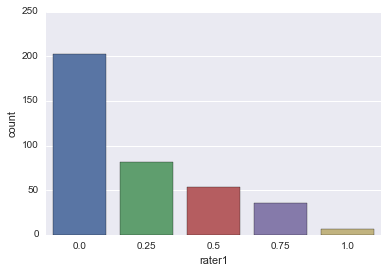

In [36]:
 ax = sns.countplot(x="rater1", data=different_rates)

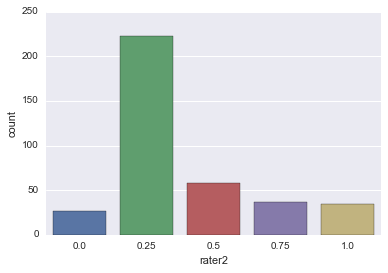

In [37]:
 bx = sns.countplot(x="rater2", data=different_rates)

In [48]:
difference = different_rates.rater1-different_rates.rater2

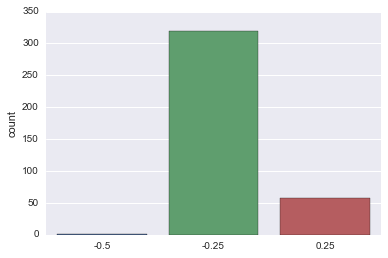

In [49]:
sns.countplot(difference)

The presence of negative values tells us that the rater 2 tends to classify people 

In [51]:
difference[difference==-0.5]

playerShort
kyle-walker    -0.5
mario-goetze   -0.5
dtype: float64